In [7]:
import numpy as np 
import matplotlib.pyplot as plt

In [8]:
from matplotlib import rc

# Configure Matplotlib to use LaTeX
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
plt.rcParams.update({'font.size': 18})

In [29]:
def gmom_boundary_n(trSigma, r, n): 
    """
    Boundary of geometric median of means at time n. 
    See Prop 1 in Lugosi and Mendelson survey, https://arxiv.org/pdf/1906.04280
    """ 
    
    return 4*np.sqrt(trSigma*(8*r+1)/n)

def tmom_boundary(trSigma, lambda_max, r, n):
    """
    Boundary of tournament median of means at time n.
    See Theorem 8 in Lugosi and Mendelson survey, https://arxiv.org/pdf/1906.04280
    """

    t1 = 960*np.sqrt(trSigma/n)
    t2 = 240*np.sqrt(lambda_max*(np.log(2) + r) / n)
    return max(t1, t2)


def gmom_union_bound(trSigma, alpha, iters):
    """
    Widths for geometric median-of-means using a 
    naive union bound 
    """
    widths = []
    for t in range(1, iters): 
        alphat = alpha / (t + t**2)
        width = gmom_boundary_n(trSigma, np.log(1/alphat), t)
        widths.append(width)
    return widths

def tmom_union_bound(trSigma, lambda_max, alpha, iters):
    """
    Widths for tournament median-of-means using a
    naive union bound
    """
    widths = []
    for t in range(1, iters): 
        alphat = alpha / (t + t**2)
        width = tmom_boundary(trSigma, lambda_max, np.log(1/alphat), t)
        widths.append(width)
    return widths

def gmom_doubling(trSigma, alpha, iters):
    """
    Widths for geometric median-of-means using the 
    doubling technique of Duchi and Haque. 
    See https://proceedings.mlr.press/v247/duchi24a/duchi24a.pdf, Prop. 16
    """

    widths = []
    for t in range(1, iters): 
        # check if t is a power of 2
        if (t & (t-1)) == 0: 
            rt = np.log(1/alpha) + 2*np.log(np.log2(t)) + 1/2
            width = gmom_boundary_n(trSigma, rt, t/2)
            widths.append(width)
        else: 
            widths.append(widths[-1])
    return widths

def tmom_doubling(trSigma, lambda_max, alpha, iters): 
    """
    Widths for median-of-means using the
    doubling technique of Duchi and Haque. See ref above. 
    """

    widths = []
    for t in range(1, iters): 
        if (t & (t-1)) == 0: 
            rt = np.log(1/alpha) + 2*np.log(np.log2(t)) + 1/2
            width = tmom_boundary(trSigma, lambda_max, rt, t/2)
            widths.append(width)
        else: 
            widths.append(widths[-1])
                    
    return widths

def CG_css(trSigma, alpha, iters): 
    """ 
    Width of sequential Catoni-Giulin estimator. 
    """

    top =  1/2 + np.log(1/alpha)
    bottom = 0 
    widths = []
    for i in range(1,iters): 
        lambda_i = np.sqrt(np.log(1/alpha)/(trSigma*i*np.log(i+2000)*50)) 
        #lambda_i = np.sqrt(np.log(1/alpha)/(d*i*np.log(i+1000))) 
        top += lambda_i**2 * np.sqrt(trSigma) * (2*np.exp(4) +1)
        bottom += lambda_i
        widths.append(top / bottom)

    return widths



In [48]:
lambda_max = 1
alpha = 0.05 
iters = 100000 

gmom_naive_tr5 = gmom_union_bound(5, alpha, iters)
gmom_doubling_tr5 = gmom_doubling(5, alpha, iters)
tmom_naive_tr5 = tmom_union_bound(5, lambda_max, alpha, iters)
tmom_doubling_tr5 = tmom_doubling(5, lambda_max, alpha, iters)
CG_tr5 = CG_css(5, alpha, iters)

gmom_naive_tr1 = gmom_union_bound(1, alpha, iters)
gmom_doubling_tr1 = gmom_doubling(1, alpha, iters)
CG_tr1 = CG_css(1, alpha, iters)


gmom_naive_tr10 = gmom_union_bound(20, alpha, iters)
gmom_doubling_tr10 = gmom_doubling(20, alpha, iters)
CG_tr10 = CG_css(20, alpha, iters)

# geom_width_d20 = geom_boundary(20, alpha, iters)
# geom_dh_width_d20 = geom_boundary_dh(20, alpha, iters)
# cat_widths_d20 = cat_boundary(20, alpha, iters, 20)

# geom_width_d100 = geom_boundary(100, alpha, iters)
# geom_dh_width_d100 = geom_boundary_dh(100, alpha, iters)
# cat_widths_d100 = cat_boundary(100, alpha, iters, 100)


/var/folders/n6/1spw36295l75d27j8zz40lxh0000gq/T/ipykernel_33173/1726905911.py:55: RuntimeWarning: divide by zero encountered in log
  rt = np.log(1/alpha) + 2*np.log(np.log2(t)) + 1/2
/var/folders/n6/1spw36295l75d27j8zz40lxh0000gq/T/ipykernel_33173/1726905911.py:7: RuntimeWarning: invalid value encountered in sqrt
  return 4*np.sqrt(trSigma*(8*r+1)/n)
/var/folders/n6/1spw36295l75d27j8zz40lxh0000gq/T/ipykernel_33173/1726905911.py:71: RuntimeWarning: divide by zero encountered in log
  rt = np.log(1/alpha) + 2*np.log(np.log2(t)) + 1/2
/var/folders/n6/1spw36295l75d27j8zz40lxh0000gq/T/ipykernel_33173/1726905911.py:16: RuntimeWarning: invalid value encountered in sqrt
  t2 = 240*np.sqrt(lambda_max*(np.log(2) + r) / n)


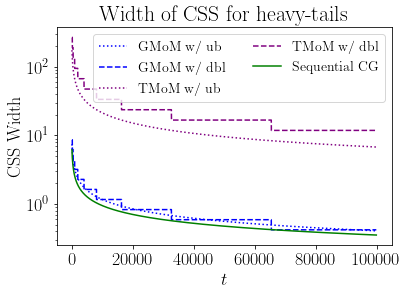

In [32]:
start = 150 

plt.plot(gmom_naive_tr5[start:], ls=":", c='blue', label='GMoM w/ ub')
plt.plot(gmom_doubling_tr5[start:], ls='--', c='blue', label='GMoM w/ dbl')
plt.plot(tmom_naive_tr5[start:], ls=":", c='purple', label='TMoM w/ ub')
plt.plot(tmom_doubling_tr5[start:], ls='--', c='purple', label='TMoM w/ dbl')
plt.plot(CG_tr5[start:], c='green', label='Sequential CG') 


plt.legend(fontsize=14, ncol=2)
plt.yscale('log')
plt.xlabel('$t$')
plt.ylabel('CSS Width')
plt.title('Width of CSS for heavy-tails')

plt.savefig('figures/heavy_tails_gmom.png', dpi=300, bbox_inches='tight')


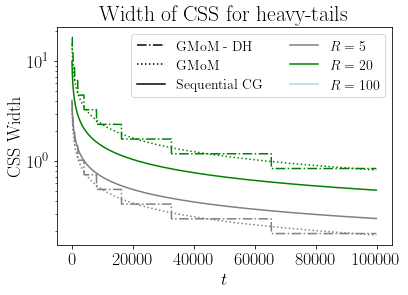

In [49]:
start = 150 

plt.plot(gmom_naive_tr1[start:], ls=':', c='gray')
plt.plot(gmom_doubling_tr1[start:], ls='-.', c='gray')
plt.plot(CG_tr1[start:], c='gray') # label='$d=5$')

plt.plot(gmom_naive_tr10[start:], ls=':', c='green')
plt.plot(gmom_doubling_tr10[start:], ls='-.', c='green')
plt.plot(CG_tr10[start:], c='green') # label='$d=20$')

# plt.plot(geom_width_d100[start:], ls=':', c='lightblue')
# plt.plot(geom_dh_width_d100[start:], ls='-.', c='lightblue')
# plt.plot(cat_widths_d100[start:], c='lightblue') # label='$d=100$')


plt.plot([], [], ls='-.', c='black', label='GMoM - DH')
plt.plot([], [], ls=':', c='black', label='GMoM')
plt.plot([], [], c='black', label='Sequential CG')
plt.plot([], [], c='gray', label='$R=5$')
plt.plot([], [], c='green', label='$R=20$')
plt.plot([], [], c='lightblue', label='$R=100$')
#plt.legend(loc='lower left', fontsize=14, ncol=2)
plt.legend(fontsize=14, ncol=2)
# plt.xscale('log')
plt.yscale('log')
plt.xlabel('$t$')
plt.ylabel('CSS Width')
plt.title('Width of CSS for heavy-tails')

plt.savefig('figures/heavy_tails.png', dpi=300, bbox_inches='tight')
